# Problem Statement: Abalone Age Prediction

# import modules

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# convert csv file to dataframe

In [3]:
df=pd.read_csv("C:/Users/Naresh/Downloads/abalone.csv")

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


# To know the shape of dataset

In [7]:
df.shape

(4177, 9)

# To calculate the age add '1.5' with Rings

In [8]:
age = []
for x in df["Rings"]:
  age.append(x+1.5)

In [9]:
df['Age'] = age

In [11]:
df['Age']

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

In [13]:
df.drop(columns=['Rings'],axis=1,inplace=True)

In [14]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [15]:
df.tail()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,13.5


# Perform Visualizations

 Univariate Analysis

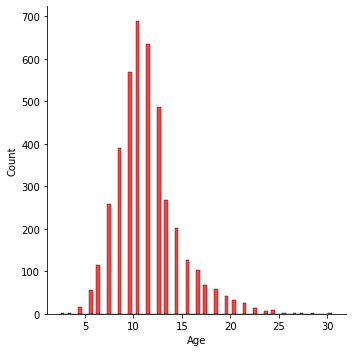

In [16]:
sns.displot(df["Age"], color='red')

<AxesSubplot:xlabel='Age', ylabel='Count'>

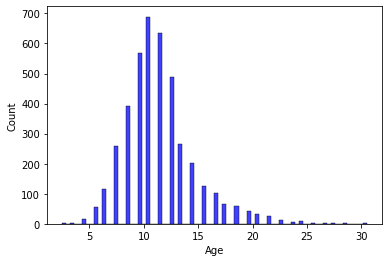

In [18]:
sns.histplot(x=df['Age'],color='blue') 

<AxesSubplot:xlabel='Age'>

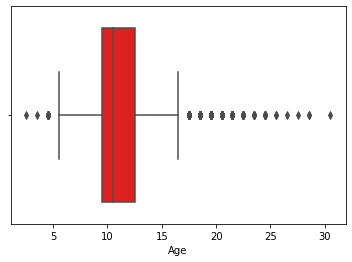

In [19]:
sns.boxplot(x=df['Age'],color='red') 

<AxesSubplot:xlabel='Age', ylabel='count'>

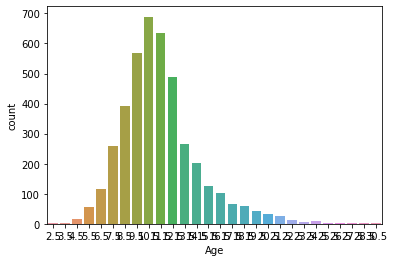

In [20]:
sns.countplot(x=df['Age']) 

# Bi-Variate Analysis

<AxesSubplot:xlabel='Height', ylabel='Age'>

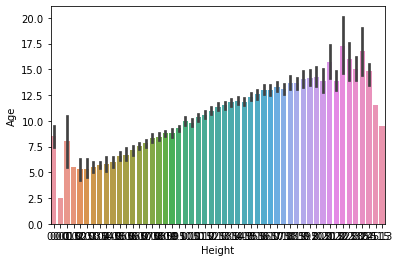

In [22]:
sns.barplot(x=df['Height'],y=df['Age'])

<AxesSubplot:xlabel='Age', ylabel='Height'>

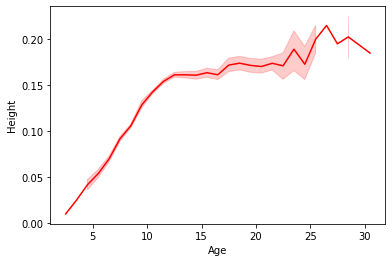

In [23]:
sns.lineplot(x=df['Age'],y=df['Height'], color='red')

<AxesSubplot:xlabel='Age', ylabel='Height'>

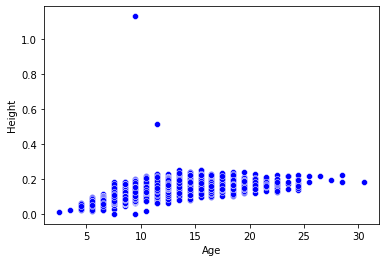

In [24]:
sns.scatterplot(x=df['Age'],y=df['Height'],color='blue')

<AxesSubplot:xlabel='Age', ylabel='Height'>

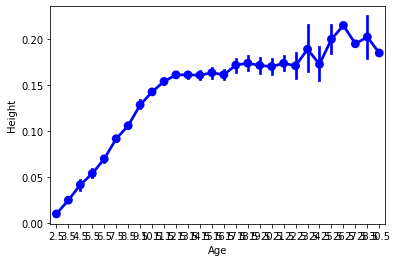

In [26]:
sns.pointplot(x=df['Age'], y=df['Height'], color="blue") 

<AxesSubplot:xlabel='Age', ylabel='Height'>

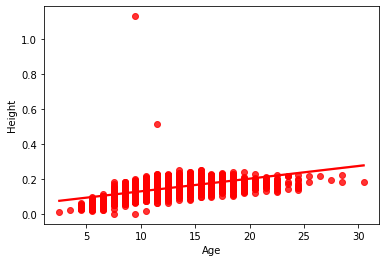

In [27]:
sns.regplot(x=df['Age'],y=df['Height'],color='Red') 

# Multi-Variate Analysis

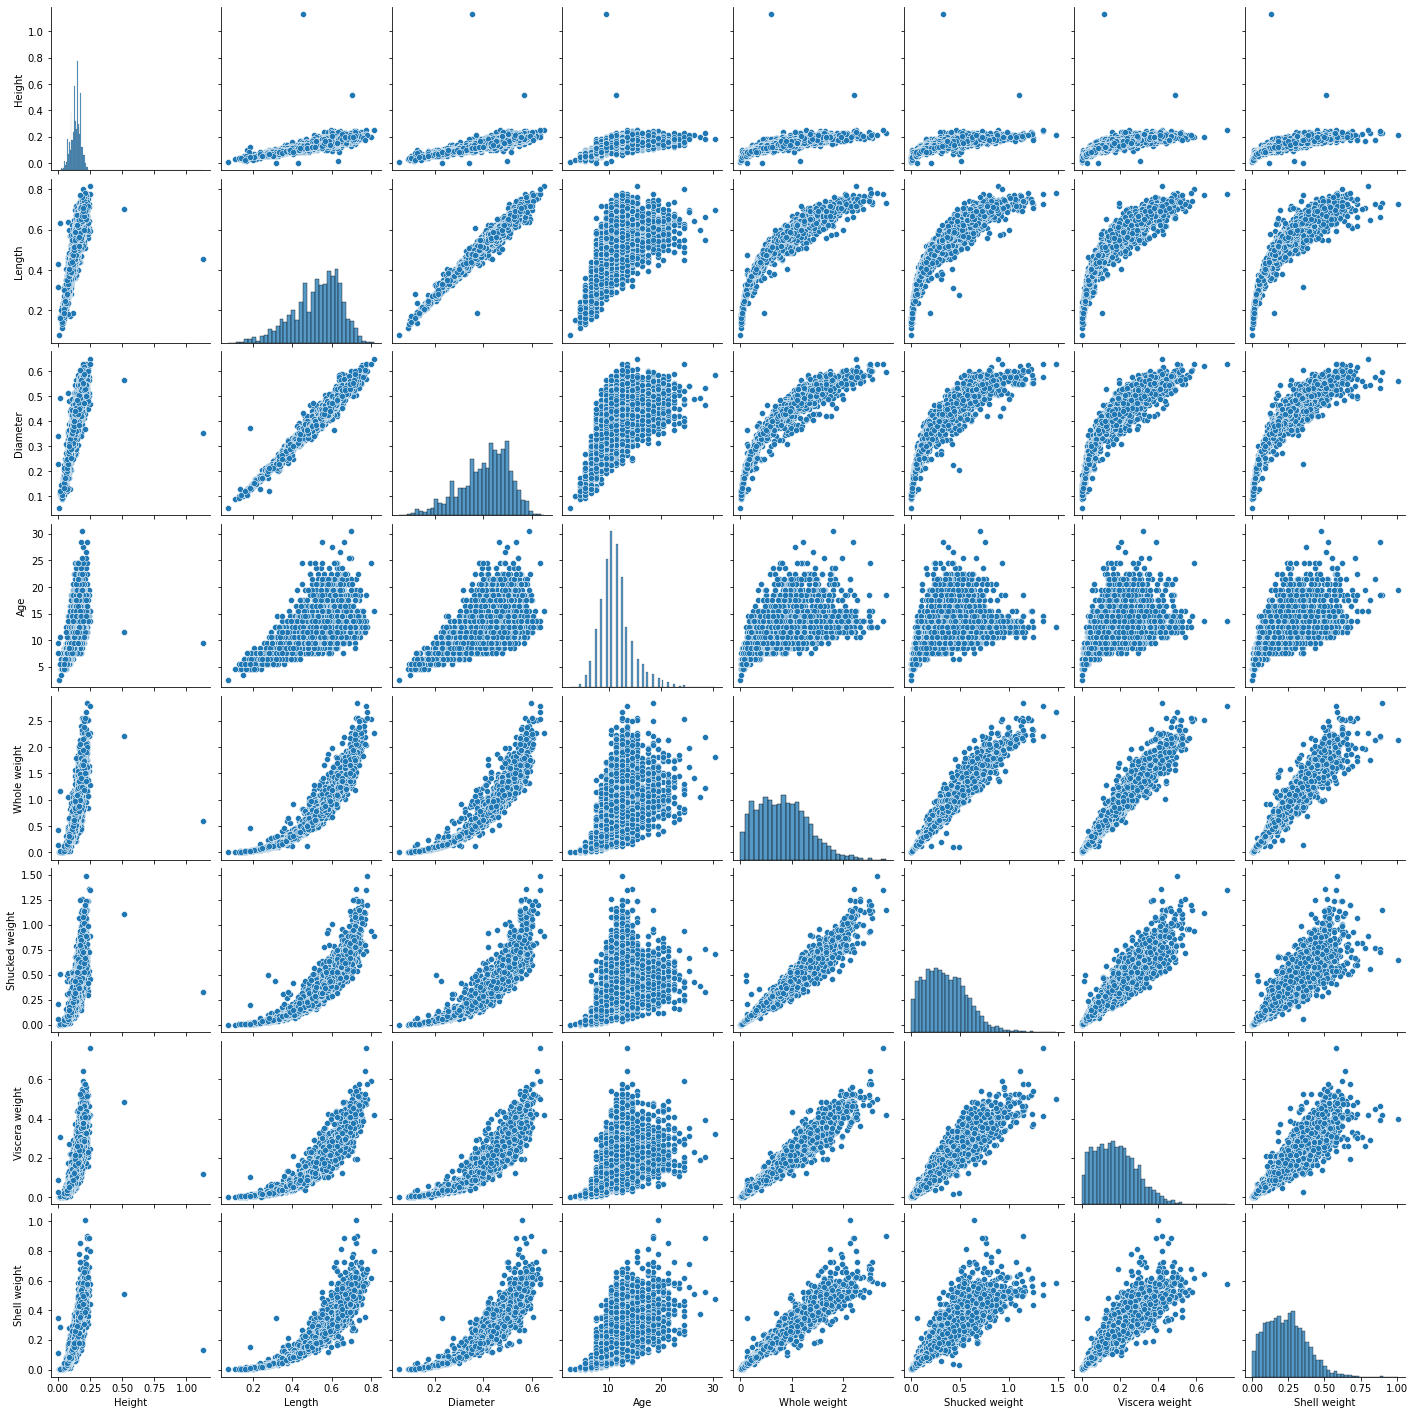

In [30]:
sns.pairplot(data=df[["Height","Length","Diameter","Age","Whole weight","Shucked weight","Viscera weight","Shell weight"]])

# Perform descriptive statistics on the dataset

In [32]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,30.500000


# check the null value and if exist delete the null value

In [40]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Find the outliers and replace them outliers

In [33]:
outliers=df.quantile(q=(0.25,0.75))

In [34]:
outliers

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,9.5
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,12.5


In [37]:
data1 = df.Age.quantile(0.25)
data2 = df.Age.quantile(0.75)
res = data2 -data1
lower_limit = data1 - 1.5 * res
df.median(numeric_only=True)

Length             0.5450
Diameter           0.4250
Height             0.1400
Whole weight       0.7995
Shucked weight     0.3360
Viscera weight     0.1710
Shell weight       0.2340
Age               10.5000
dtype: float64

<AxesSubplot:xlabel='Age'>

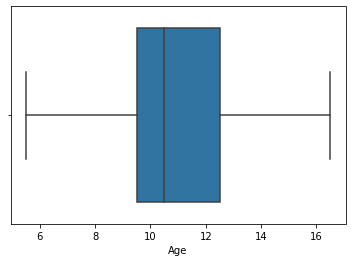

In [38]:
df['Age'] = np.where(df['Age'] < lower_limit, 7, df['Age'])
sns.boxplot(x=df.Age,showfliers = False)

# Check for Categorical columns and perform encoding

In [41]:
cod = LabelEncoder()
df.Sex = cod.fit_transform(df.Sex)

In [42]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Split the data into dependent and independent variables

In [44]:
dep= df["Sex"]

In [45]:
dep

0       2
1       2
2       0
3       2
4       1
       ..
4172    0
4173    2
4174    2
4175    0
4176    2
Name: Sex, Length: 4177, dtype: int32

In [46]:
indep=df.drop(columns=["Sex"],axis=1)
indep.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


# Scale the independent variables

In [48]:
indep_Scaled = pd.DataFrame(scale(indep), columns=indep.columns)
indep_Scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.577830
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.919022
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.294809
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.017298
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.919022


# Split the data into training and testing

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(indep_Scaled, dep, test_size=0.5, random_state=0)

In [67]:
X_train.shape,X_test.shape

((2088, 8), (2089, 8))

In [68]:
Y_train.shape,Y_test.shape

((2088,), (2089,))

In [69]:
X_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
4149,-2.031938,-1.943819,-1.662195,-1.437280,-1.335371,-1.451569,-1.500373,-1.231128
315,-0.616198,-0.532927,-0.705762,-0.755087,-0.745112,-1.036427,-0.710063,-0.606915
1604,0.133312,0.474853,0.011563,0.292166,0.268692,0.678883,0.216754,0.017298
926,-0.782755,-0.835261,-1.183978,-0.823409,-0.641479,-0.853947,-1.033372,-0.919022
3077,1.340855,1.029133,0.609334,1.460766,1.471739,1.796573,1.197456,0.017298


In [70]:
X_test.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
668,0.216591,0.172519,0.370226,0.181016,-0.368878,0.569396,0.690940,0.953617
1580,-0.199803,-0.079426,-0.466653,-0.433875,-0.443224,-0.343004,-0.325685,-0.606915
3784,0.799543,0.726798,0.370226,0.870348,0.755318,1.764639,0.565209,0.329404
463,-2.531611,-2.447709,-2.020857,-1.579022,-1.522362,-1.538247,-1.572219,-1.543234
2615,1.007740,0.928354,0.848442,1.390405,1.415417,1.778325,0.996287,0.641511


In [71]:
Y_train.head()

4149    1
315     1
1604    2
926     1
3077    2
Name: Sex, dtype: int32

In [72]:
Y_test.head()

668     2
1580    1
3784    2
463     1
2615    2
Name: Sex, dtype: int32

# Train the model

In [73]:
model = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [74]:
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [75]:
y_predict = model.predict(X_test)

# Error matrix

In [76]:
accuracy_score(Y_test,y_predict)

0.8085208233604595

In [77]:
pd.crosstab(Y_test,y_predict)

col_0,0,1,2
Sex,,,
0,521,23,108
1,39,613,41
2,121,68,555


In [79]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.77      0.80      0.78       652
           1       0.87      0.88      0.88       693
           2       0.79      0.75      0.77       744

    accuracy                           0.81      2089
   macro avg       0.81      0.81      0.81      2089
weighted avg       0.81      0.81      0.81      2089

